In [1]:
import pandas as pd

In [2]:
pwd

'C:\\Users\\sujatha'

In [3]:
strokeData = pd.read_csv(r'C:\\Users\\sujatha\desktop\sujatha\healthcare-dataset-stroke-data.csv')
strokeData

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [4]:
strokeData.drop(['id'],axis = 1,inplace = True)

<AxesSubplot:ylabel='Frequency'>

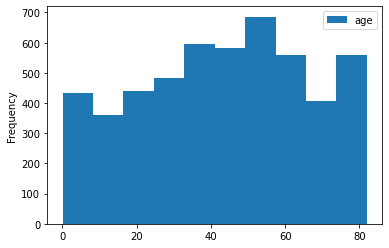

In [5]:
strokeData[['age']].plot.hist()

In [6]:
strokeData["age"]=pd.cut(strokeData["age"],bins=[0,20,40,60,100],labels=["teenage","youth","middle","oldage"])

In [7]:
strokeData.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,oldage,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,oldage,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,oldage,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,middle,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,oldage,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [8]:
strokeData["age"] = strokeData["age"].astype(object)

In [9]:
x = strokeData.drop(["stroke"],axis = 1)
y = strokeData[['stroke']]

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.1,stratify=y,random_state= 42)

In [12]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((4599, 10), (511, 10), (4599, 1), (511, 1))

# processing of Train Set

In [13]:
import numpy as np
strokeCategoricalTrain = x_train.select_dtypes(object)
strokeNumericalTrain = x_train.select_dtypes(np.number)

In [14]:
strokeCategoricalTrain.isna().sum()

gender            0
age               0
ever_married      0
work_type         0
Residence_type    0
smoking_status    0
dtype: int64

In [15]:
from sklearn.preprocessing import OneHotEncoder
ohEncoder = OneHotEncoder()

In [16]:
ohEncoder.fit(strokeCategoricalTrain)

OneHotEncoder()

In [17]:
strokeCategoricalTrainEncoded = pd.DataFrame(ohEncoder.transform(strokeCategoricalTrain).toarray())

# Numerical data processing

In [18]:
strokeNumericalTrain.isna().sum()

hypertension           0
heart_disease          0
avg_glucose_level      0
bmi                  187
dtype: int64

In [19]:
strokeNumericalTrain['bmi']=strokeNumericalTrain['bmi'].interpolate(method="polynomial",order=5)

<ipython-input-19-8e23552e1a31>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  strokeNumericalTrain['bmi']=strokeNumericalTrain['bmi'].interpolate(method="polynomial",order=5)


In [20]:
strokeNumericalTrain.head()

,hypertension,heart_disease,avg_glucose_level,bmi
386,1,0,251.60,27.1
2236,0,0,102.35,23.6
1419,0,0,81.94,27.7
3508,0,0,112.19,53.4
4264,0,0,66.69,21.5


In [21]:
from sklearn.preprocessing import RobustScaler
robScale = RobustScaler()

In [22]:
robScale.fit(strokeNumericalTrain)

RobustScaler()

In [23]:
strokeNumericalTrainEncoded = pd.DataFrame(robScale.transform(strokeNumericalTrain),columns = strokeNumericalTrain.columns)

In [24]:
strokeFinal = pd.concat([strokeCategoricalTrainEncoded,strokeNumericalTrainEncoded],axis = 1)
strokeFinal

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,hypertension,heart_disease,avg_glucose_level,bmi
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,4.296137,-0.103093
1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.278099,-0.463918
2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,-0.271369,-0.041237
3,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.543007,2.608247
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.681922,-0.680412
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4594,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.600350,0.020619
4595,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,-0.770225,-0.268041
4596,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.577467,-0.886598
4597,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,-0.483780,-0.216495


# training logistic regression model with ols and stochastic descent

In [25]:
from sklearn.linear_model import LogisticRegression, SGDClassifier
logreg = LogisticRegression(penalty='l2',dual=False,tol=0.0001, C=0.3,fit_intercept=True, intercept_scaling=1,class_weight={0:1,1:5},random_state=42,solver='lbfgs',max_iter=1000, multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)
sgdClass = SGDClassifier(loss='hinge',penalty='l2', alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=1000, tol=0.001, shuffle=True, verbose=0, epsilon=0.1, n_jobs=None, random_state=None, learning_rate='optimal', eta0=0.0, power_t=0.5, early_stopping=False, validation_fraction=0.1, n_iter_no_change=5, class_weight=None, warm_start=False, average=False)

In [26]:
logreg.fit(strokeFinal,y_train)

C:\Users\sujatha\Downloads\anaconda\envs\Test\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression(C=0.3, class_weight={0: 1, 1: 5}, max_iter=1000,
                   random_state=42)

In [27]:
sgdClass.fit(strokeFinal,y_train)

C:\Users\sujatha\Downloads\anaconda\envs\Test\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SGDClassifier()

In [28]:
strokeCategoricalTest = x_test.select_dtypes(object)
strokeNumericalTest = x_test.select_dtypes(np.number)

In [29]:
strokeCategoricalTest.isna().sum()

gender            0
age               0
ever_married      0
work_type         0
Residence_type    0
smoking_status    0
dtype: int64

In [30]:
strokeCategoricalTestEncoded = pd.DataFrame(ohEncoder.transform(strokeCategoricalTest).toarray())

In [31]:
strokeNumericalTest.isna().sum()

hypertension          0
heart_disease         0
avg_glucose_level     0
bmi                  14
dtype: int64

In [32]:
strokeNumericalTrain['bmi']=strokeNumericalTrain['bmi'].interpolate(method="polynomial",order=5)

<ipython-input-32-8e23552e1a31>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  strokeNumericalTrain['bmi']=strokeNumericalTrain['bmi'].interpolate(method="polynomial",order=5)


In [33]:
strokeNumericalTest['bmi']=strokeNumericalTest["bmi"].fillna(strokeNumericalTest["bmi"].mean())

<ipython-input-33-562679b7049f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  strokeNumericalTest['bmi']=strokeNumericalTest["bmi"].fillna(strokeNumericalTest["bmi"].mean())


In [34]:
from sklearn.preprocessing import RobustScaler
robScale = RobustScaler()
robScale.fit(strokeNumericalTest)

RobustScaler()

In [35]:
robScale.transform(strokeNumericalTest)

array([[ 1.        ,  1.        , -0.27303856,  0.51648352],
       [ 0.        ,  0.        , -0.45109424,  0.76923077],
       [ 0.        ,  0.        , -0.25279142,  1.38461538],
       ...,
       [ 0.        ,  0.        , -0.12416257,  0.03287859],
       [ 0.        ,  0.        ,  0.12118505, -1.08791209],
       [ 1.        ,  0.        ,  3.03171059,  0.12087912]])

In [36]:
strokeNumericalTestEncoded = pd.DataFrame(robScale.transform(strokeNumericalTest),columns = strokeNumericalTest.columns)

In [37]:
strokeFinal = pd.concat([strokeCategoricalTestEncoded,strokeNumericalTestEncoded],axis = 1)
strokeFinal

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,hypertension,heart_disease,avg_glucose_level,bmi
0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,-0.273039,0.516484
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.451094,0.769231
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.252791,1.384615
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.121781,-0.076923
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.221825,0.032879
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
506,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.199196,-0.153846
507,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.213488,-0.164835
508,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-0.124163,0.032879
509,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.121185,-1.087912


In [51]:
predictionsLogReg = logreg.predict(strokeFinal)
predictionsSGDclass = sgdClass.predict(strokeFinal)

# CLASSIFICATION OF METRICS

In [52]:
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,f1_score

In [53]:
confusion_matrix(predictionsLogReg, y_test)

array([[461,  20],
       [ 25,   5]], dtype=int64)

In [54]:
accuracy_score(predictionsLogReg, y_test)

0.9119373776908023

In [55]:
recall_score(predictionsLogReg, y_test)

0.16666666666666666

In [56]:
precision_score(predictionsLogReg, y_test)

0.2

In [57]:
f1_score(predictionsLogReg, y_test)

0.1818181818181818